<a href="https://colab.research.google.com/github/annakl97/NGG6050/blob/main/LeonardAnna_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NGG 6050: Quant Neuro**

**HW3: Binomial Distribution: Quantal Release exercise**

Anna Leonard

2023.09.04

**Exercise 1**

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

$P(X=k\: successes)=\left ( \frac{n}{k} \right )p^{k}\left ( 1-p \right )^{n-k}$

╒════════════════════════╤═══════════════╕
│   Quanta Released (#)] │   Probability │
╞════════════════════════╪═══════════════╡
│                      0 │     0.8       │
├────────────────────────┼───────────────┤
│                      1 │     0.2684    │
├────────────────────────┼───────────────┤
│                      2 │     0.03355   │
├────────────────────────┼───────────────┤
│                      3 │     0.005592  │
├────────────────────────┼───────────────┤
│                      4 │     0.001049  │
├────────────────────────┼───────────────┤
│                      5 │     0.0002097 │
├────────────────────────┼───────────────┤
│                      6 │     4.369e-05 │
├────────────────────────┼───────────────┤
│                      7 │     9.362e-06 │
├────────────────────────┼───────────────┤
│                      8 │     2.048e-06 │
├────────────────────────┼───────────────┤
│                      9 │     4.551e-07 │
├────────────────────────┼───────────────┤
│          

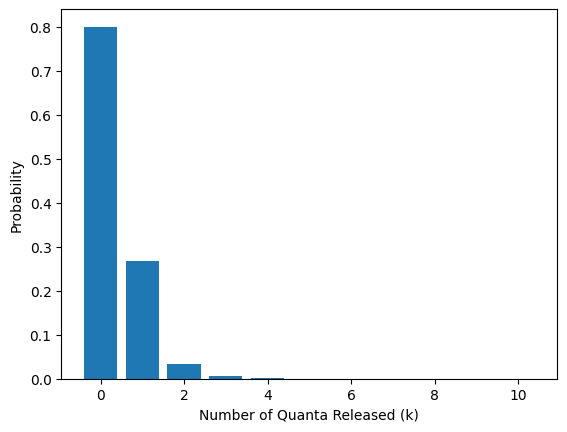

In [1]:
# prob = probability of given number of "successes" (released quanta)
# n = number of quanta available
# p = probability of release of each quanta
# k = number of quanta released

# Import necessary packages
import tabulate as t
import matplotlib.pyplot as plt

# Define list of k values
# Create empty objects for a table of the results, and probability values for each value of k
k_values = list(range(0, 11))
table = []
prob_values = []

# Loop through possible values of k, 1-10, and calculate probability, given n and p
for k in range(0, 11):

  n = 10
  p = 0.2

  if k == 0: # probability of failure = 1 - prob. of success; without doing this, 0 in the normal calculation gives a divide by zero error

    prob = (1-p)

  else: # binomial distribution equation shown above

    prob = ( n/k ) * (p ** k) * ((1 - p) ** (n-k))

  # Append values to table and prob_values list
  table.append([k, '{:0.3e}'.format(prob)])
  prob_values.append(prob)

# Print a table
print(t.tabulate(table, headers=['Quanta Released (#)]', 'Probability'], tablefmt='fancy_grid'))

# Above this line, I generated this code myself, using functions/formatting I learned from AI in previous assigments
# I then asked Bard to generate code to produce a graph
# That conversation can be found here: https://g.co/bard/share/85378c692ba3

# Create a bar chart
plt.bar(k_values, prob_values)

# Label the axes
plt.xlabel("Number of Quanta Released (k)")
plt.ylabel("Probability")

# Show the chart
plt.show()

## Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability *p*(*data* | *parameters*) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see [here](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) for an extended discussion). The maximum value of this function is called the maximum likelihood.

╒═════════════════════════╤═════════════════════╕
│   Quantal Release Prob. │   Prob. of 8 Quanta │
╞═════════════════════════╪═════════════════════╡
│                     0.1 │           9.3e-09   │
├─────────────────────────┼─────────────────────┤
│                     0.2 │           1.174e-06 │
├─────────────────────────┼─────────────────────┤
│                     0.3 │           1.351e-05 │
├─────────────────────────┼─────────────────────┤
│                     0.4 │           5.351e-05 │
├─────────────────────────┼─────────────────────┤
│                     0.5 │           0.0001068 │
├─────────────────────────┼─────────────────────┤
│                     0.6 │           0.0001204 │
├─────────────────────────┼─────────────────────┤
│                     0.7 │           7.354e-05 │
├─────────────────────────┼─────────────────────┤
│                     0.8 │           1.879e-05 │
├─────────────────────────┼─────────────────────┤
│                     0.9 │           7.533e-07 │


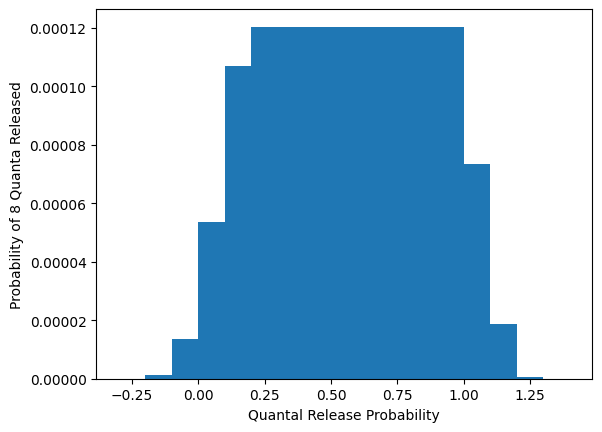

We are most likely to see a release of 8 quanta when the quantal release probability is: 0.6


In [ ]:
# prob = probability of given number of successes
# n = number of quanta available
# p = probability of release of each quanta
# k = number of quanta released

import tabulate as t
import matplotlib.pyplot as plt
import numpy as np

p_values = list(np.arange(0.1, 1.1, 0.1))
table = []
prob_values = []

for p in np.arange(0.1, 1.1, 0.1):

  k = 8
  n = 14

  prob = ( n/k ) * (p ** k) * ((1 - p) ** (n-k))

  table.append([p, '{:0.3e}'.format(prob)])
  prob_values.append(prob)

# Print a table
print(t.tabulate(table, headers=['Quantal Release Prob.', 'Prob. of 8 Quanta'], tablefmt='fancy_grid'))

# Create a bar chart
plt.bar(p_values, prob_values)

# Label the axes
plt.xlabel("Quantal Release Probability")
plt.ylabel("Probability of 8 Quanta Released")

# Show the chart
plt.show()

# I used ChatGPT to figure out how to print out the maximum likelihood value of p
# That conversation is here: https://chat.openai.com/share/ec4ef576-f438-48d3-9cf0-71faab7a9e77

max_prob_index = prob_values.index(max(prob_values))
optimal_p = p_values[max_prob_index]
print(f"We are most likely to see a release of 8 quanta when the quantal release probability is: {optimal_p}")

**Exercise 3**

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [ ]:
# Computing for the specific case of p=0.1
import math as m

# Total quanta available = 14 (n=14)
# Quantal release probability = 0.1 (p=0.1)
# Trial 1: quanta released = 8 (k=8)
# Trial 2: quanta released = 5 (k=5)

n = 14
p = 0.1

# Trial 1
k1 = 8
prob_1 = ( n/k1 ) * (p ** k1) * ((1 - p) ** (n-k1))

# Trial 2

k2 = 5
prob_2 = ( n/k2 ) * (p ** k2) * ((1 - p) ** (n-k2))

# Total probability as product of two independent probabilities

total_prob_product = prob_1 * prob_2

# Total probability as the sum of the logs of two independent probabilities

total_prob_log = m.log(prob_1) + m.log(prob_2)

print("Likelihood (product) = ", total_prob_product)
print("Likelihood (log sum) = ", total_prob_log)



Likelihood (product) =  1.0088665472637811e-13
Likelihood (log sum) =  -29.924778738673407


╒═════════════════════════╤══════════════╤══════════════════╕
│   Quantal Release Prob. │   Likelihood │   Log Likelihood │
╞═════════════════════════╪══════════════╪══════════════════╡
│                     0.1 │    1.009e-13 │           -29.92 │
├─────────────────────────┼──────────────┼──────────────────┤
│                     0.2 │    1.412e-10 │           -22.68 │
├─────────────────────────┼──────────────┼──────────────────┤
│                     0.3 │    3.709e-09 │           -19.41 │
├─────────────────────────┼──────────────┼──────────────────┤
│                     0.4 │    1.546e-08 │           -17.98 │
├─────────────────────────┼──────────────┼──────────────────┤
│                     0.5 │    1.825e-08 │           -17.82 │
├─────────────────────────┼──────────────┼──────────────────┤
│                     0.6 │    6.872e-09 │           -18.8  │
├─────────────────────────┼──────────────┼──────────────────┤
│                     0.7 │    6.812e-10 │           -21.11 │
├───────

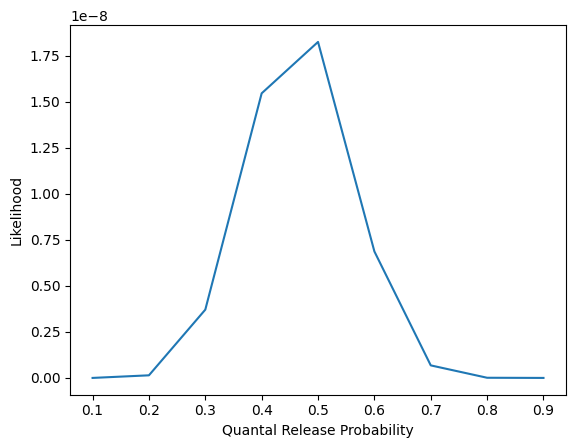

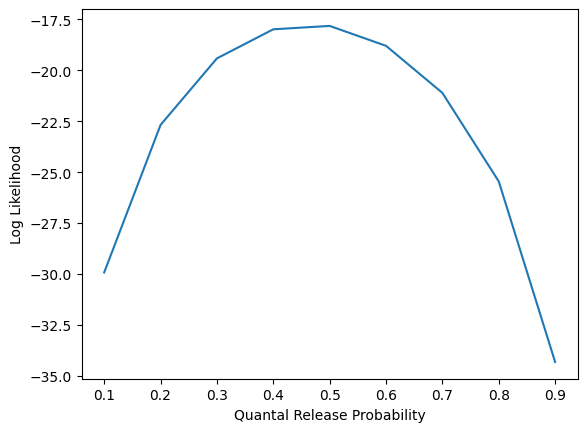

Max likelihood (product method) occurs when quantal release p = 0.5
Max likelihood (log sum method) occurs when quantal release p = 0.5


In [2]:
# Computing for range of p = [0.1-0.9]
# I did not use AI to generate this code, but tried to write it myself based on previous exercises where I got similar results from AI

import tabulate as t
import matplotlib.pyplot as plt
import numpy as np
import math as m

p_values = list(np.arange(0.1, 1.0, 0.1))
table = []
likelihood_values = []
log_likelihood_values = []

for p in np.arange(0.1, 1.0, 0.1):

  n = 14
  k1 = 8
  k2 = 5

  prob_1 = ( n/k1 ) * (p ** k1) * ((1 - p) ** (n-k1))
  prob_2 = ( n/k2 ) * (p ** k2) * ((1 - p) ** (n-k2))

  likelihood = prob_1 * prob_2
  log_likelihood = m.log(prob_1) + m.log(prob_2)

  table.append([p, '{:0.3e}'.format(likelihood), '{:0.3e}'.format(log_likelihood)])
  likelihood_values.append(likelihood)
  log_likelihood_values.append(log_likelihood)

# Print a table
print(t.tabulate(table, headers=['Quantal Release Prob.', 'Likelihood', 'Log Likelihood'], tablefmt='fancy_grid'))

# Create a line chart
plt.plot(p_values, likelihood_values)
plt.xlabel("Quantal Release Probability")
plt.ylabel("Likelihood")
plt.show()

plt.plot(p_values, log_likelihood_values)
plt.xlabel("Quantal Release Probability")
plt.ylabel("Log Likelihood")
plt.show()

#Compute maximum Likelihood and maximum Log Likelihood

max_likelihood_index = likelihood_values.index(max(likelihood_values))
optimal_p_prod = p_values[max_likelihood_index]

max_log_likelihood_index = log_likelihood_values.index(max(log_likelihood_values))
optimal_p_log = p_values[max_log_likelihood_index]

print("Max likelihood (product method) occurs when quantal release p =", optimal_p_prod)
print("Max likelihood (log sum method) occurs when quantal release p =",optimal_p_log)


╒═════════════════════════╤══════════════╤══════════════════╕
│   Quantal Release Prob. │   Likelihood │   Log Likelihood │
╞═════════════════════════╪══════════════╪══════════════════╡
│                    0.1  │    1.009e-13 │           -29.92 │
├─────────────────────────┼──────────────┼──────────────────┤
│                    0.11 │    2.945e-13 │           -28.85 │
├─────────────────────────┼──────────────┼──────────────────┤
│                    0.12 │    7.705e-13 │           -27.89 │
├─────────────────────────┼──────────────┼──────────────────┤
│                    0.13 │    1.838e-12 │           -27.02 │
├─────────────────────────┼──────────────┼──────────────────┤
│                    0.14 │    4.049e-12 │           -26.23 │
├─────────────────────────┼──────────────┼──────────────────┤
│                    0.15 │    8.33e-12  │           -25.51 │
├─────────────────────────┼──────────────┼──────────────────┤
│                    0.16 │    1.614e-11 │           -24.85 │
├───────

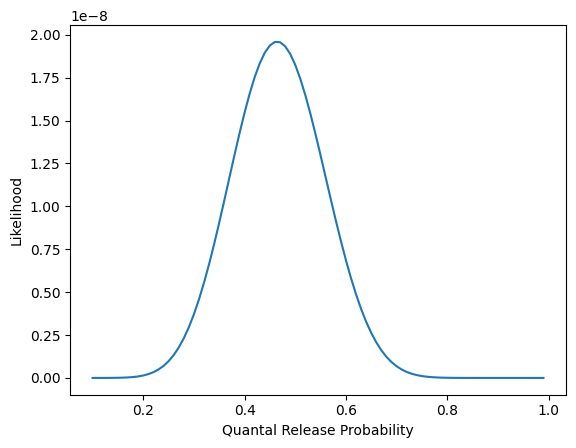

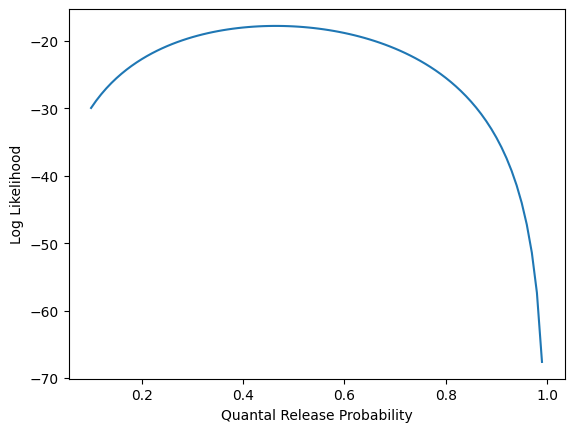

Max likelihood (product method) occurs when quantal release p = 0.45999999999999985
Max likelihood (log sum method) occurs when quantal release p = 0.45999999999999985


In [3]:
# Computing for range of p = [0.1-0.9] in increments of 0.01 rather than 0.1
# Based on results, the log likelihood method seems to give a more precise answer here while the product method does not

import tabulate as t
import matplotlib.pyplot as plt
import numpy as np
import math as m

p_values = list(np.arange(0.1, 1.0, 0.01))
table = []
likelihood_values = []
log_likelihood_values = []

for p in np.arange(0.1, 1.0, 0.01):

  n = 14
  k1 = 8
  k2 = 5

  prob_1 = ( n/k1 ) * (p ** k1) * ((1 - p) ** (n-k1))
  prob_2 = ( n/k2 ) * (p ** k2) * ((1 - p) ** (n-k2))

  likelihood = prob_1 * prob_2
  log_likelihood = m.log(prob_1) + m.log(prob_2)

  table.append([p, '{:0.3e}'.format(likelihood), '{:0.3e}'.format(log_likelihood)])
  likelihood_values.append(likelihood)
  log_likelihood_values.append(log_likelihood)

# Print a table
print(t.tabulate(table, headers=['Quantal Release Prob.', 'Likelihood', 'Log Likelihood'], tablefmt='fancy_grid'))

# Create a line chart
plt.plot(p_values, likelihood_values)
plt.xlabel("Quantal Release Probability")
plt.ylabel("Likelihood")
plt.show()

plt.plot(p_values, log_likelihood_values)
plt.xlabel("Quantal Release Probability")
plt.ylabel("Log Likelihood")
plt.show()

#Compute maximum Likelihood and maximum Log Likelihood

max_likelihood_index = likelihood_values.index(max(likelihood_values))
optimal_p_prod = p_values[max_likelihood_index]

max_log_likelihood_index = log_likelihood_values.index(max(log_likelihood_values))
optimal_p_log = p_values[max_log_likelihood_index]

print("Max likelihood (product method) occurs when quantal release p =", optimal_p_prod)
print("Max likelihood (log sum method) occurs when quantal release p =",optimal_p_log)


## Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	| Count
---------------- | -------
0 | 0
1 | 0
2 | 3
4 | 10
5 | 19
6 | 26
7 | 16
8 | 16
9 | 5
10 | 5
11 | 0
12 | 0
13 | 0
14 | 0

What is the most likely value of *p* (which we typically refer to as $\hat{p}$, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find $\hat{p}$.

In [ ]:
# I think I could probably calculate this myself, essentially using the code as a calculator, given a lot of time and a lot of lines of unnecessary code
# This time, I decided to be more efficient and go to ChatGPT
# My conversation with ChatGPT to produce this code can be found here: https://chat.openai.com/share/169f8291-da4b-427c-b6c6-449c0ca9302e
# This was my first experience with ChatGPT rather than Google Bard (my phone is working again)

import numpy as np
from scipy.optimize import minimize_scalar

# Define the log-likelihood function
def log_likelihood(p, data):
    log_likelihood = 0
    for n, k in data:
        log_likelihood += k * np.log(p) + (n - k) * np.log(1 - p)
    return -log_likelihood  # Minimize the negative log-likelihood

# Define the observed data
data = [(3, 2), (10, 4), (19, 5), (26, 6), (16, 7), (16, 8), (5, 9), (10, 10)]

# Find the maximum likelihood estimate for p
result = minimize_scalar(log_likelihood, bounds=(0.01, 0.9), args=(data))

# Round the maximum likelihood estimate to the hundredths place
max_likelihood_p_rounded = round(result.x, 2)
print(f"Maximum likelihood estimate for p (p-hat): {max_likelihood_p_rounded:.2f}")


Maximum likelihood estimate for p (p-hat): 0.49


**Exercise 5**

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute  𝑝̂  . Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [ ]:
# This code was generated through an extension of the ChatGPT conversation cited above
# https://chat.openai.com/share/169f8291-da4b-427c-b6c6-449c0ca9302e

import numpy as np
from scipy.optimize import minimize_scalar

# Define the log-likelihood function
def log_likelihood(p, n, k):
    log_likelihood = k * np.log(p) + (n - k) * np.log(1 - p)
    return -log_likelihood  # Minimize the negative log-likelihood

# Define the observed data
n = 14  # Total number of available quanta
k = 7   # Number of quantal events observed

# Find the maximum likelihood estimate for p
result = minimize_scalar(log_likelihood, bounds=(0.01, 0.9), args=(n, k))

# Round the maximum likelihood estimate to the hundredths place
max_likelihood_p_rounded = round(result.x, 2)
print(f"Maximum likelihood estimate for p (rounded to the hundredths place): {max_likelihood_p_rounded:.2f}")



Maximum likelihood estimate for p (rounded to the hundredths place): 0.50


In [ ]:
# This code was generated through an extension of the ChatGPT conversation cited above
# https://chat.openai.com/share/169f8291-da4b-427c-b6c6-449c0ca9302e

import numpy as np
from scipy.stats import chi2_contingency

# Define the observed data
observed_data = np.array([[7, 7], [7, 7]])  # Observed data: 7 quantal events, 7 non-events (total = 14)

# Define the expected data under the null hypothesis (p = 0.3)
expected_data = np.array([[0.3 * 14, 0.7 * 14], [0.3 * 14, 0.7 * 14]])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(observed_data)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

# Check if the p-value is less than the significance level
if p < alpha:
    print("Reject the null hypothesis. Temperature had an effect on release probability.")
else:
    print("Fail to reject the null hypothesis. Insufficient evidence to conclude temperature had an effect.")


Chi-squared statistic: 0.00
P-value: 1.0000
Fail to reject the null hypothesis. Insufficient evidence to conclude temperature had an effect.
